# 1. Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:

# Configuración visual
plt.style.use('seaborn-v0_8-pastel')  # Estilo pastel válido
sns.set_palette('muted')
%matplotlib inline



# 2. Carga del dataset


In [ ]:

df = pd.read_csv('./data/raw/mental_health_dataset.csv') 
print("Forma del dataset:", df.shape)


Forma del dataset: (10000, 14)



# 3. Vista general del dataset


In [ ]:

display(df.head()) # Primeras 5 filas
display(df.info()) # Miramos el tipo de elemento de cada columna (caracteristicas)
display(df.describe(include='all'))


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

None

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
count,10000.000000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000
unique,NaN,4,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Male,Employed,On-site,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,4557,5868,5044,6969,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5892
mean,41.557600,NaN,NaN,NaN,NaN,NaN,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210,NaN
std,13.749581,NaN,NaN,NaN,NaN,NaN,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,NaN,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000,NaN
50%,41.500000,NaN,NaN,NaN,NaN,NaN,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000,NaN
75%,53.000000,NaN,NaN,NaN,NaN,NaN,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000,NaN



# 4. Análisis de valores nulos


In [15]:
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
print("Variables con valores nulos:")
display(missing)


Variables con valores nulos:


Series([], dtype: float64)

como no hay valores nulos, para la implementación se simuara valores nulos


# 5. Distribución de variables categóricas principales


In [22]:
#mostrar las variables categóricas
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:")
for var in categorical_vars:
    print(f"- {var} ({df[var].nunique()} categorías)")

Variables categóricas:
- gender (4 categorías)
- employment_status (4 categorías)
- work_environment (3 categorías)
- mental_health_history (2 categorías)
- seeks_treatment (2 categorías)
- mental_health_risk (3 categorías)


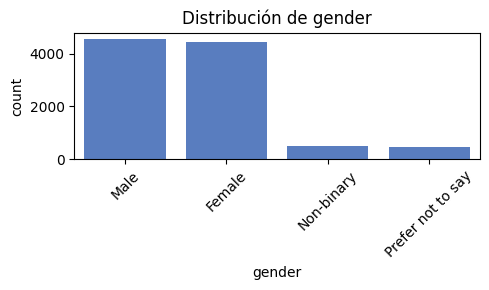

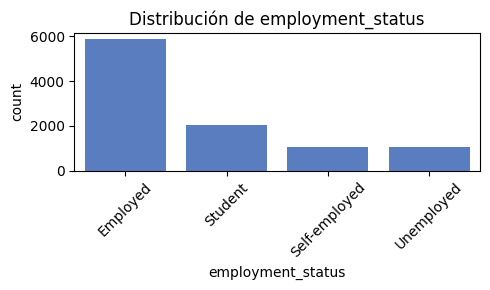

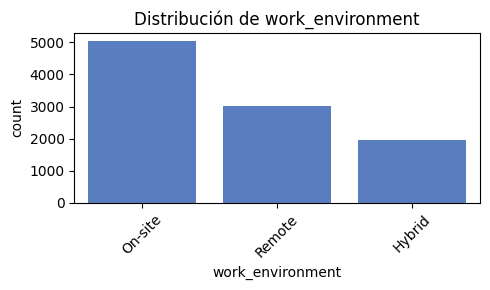

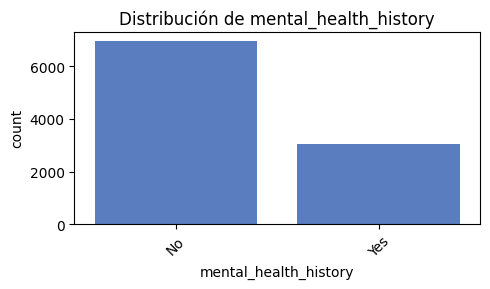

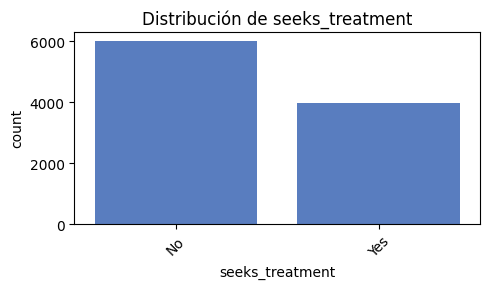

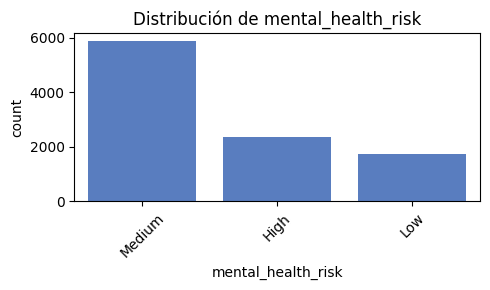

In [34]:
# Visualización de la distribución de variables categóricas
for col in categorical_vars:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# 6. Distribución de variables numéricas


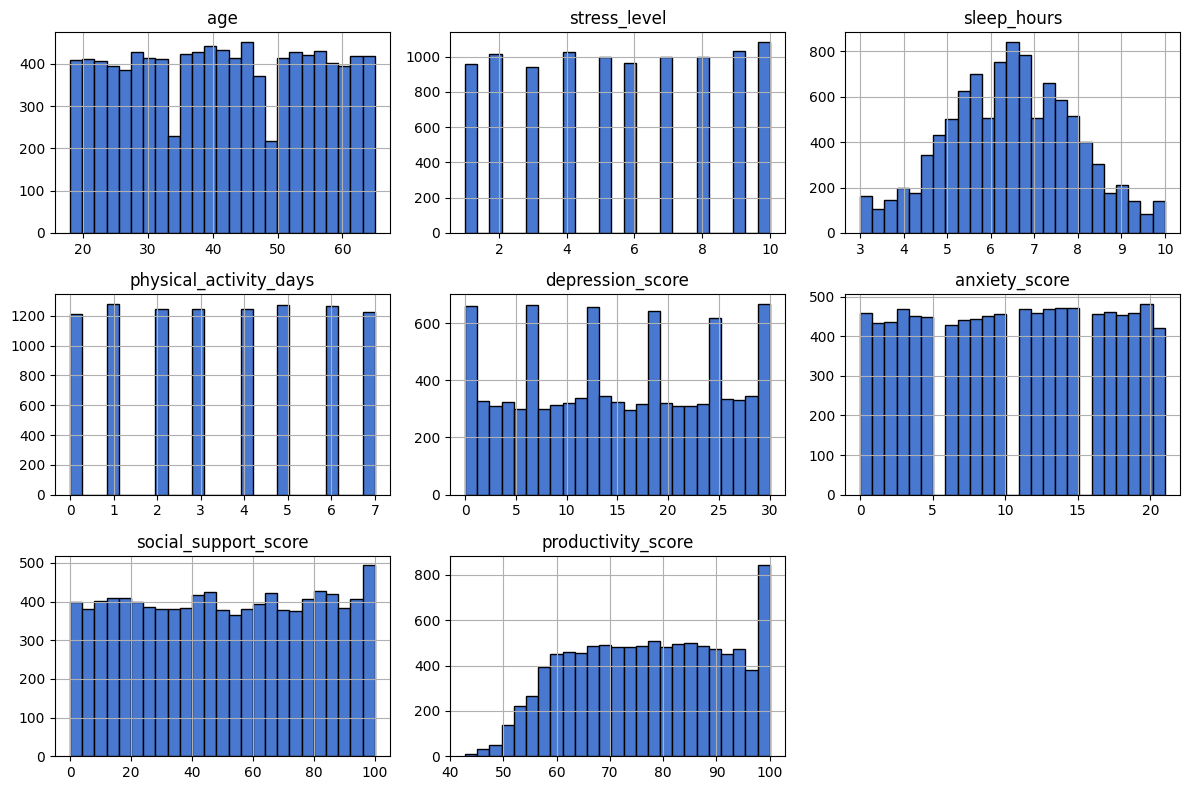

In [27]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# 7. Correlación entre variables numéricas


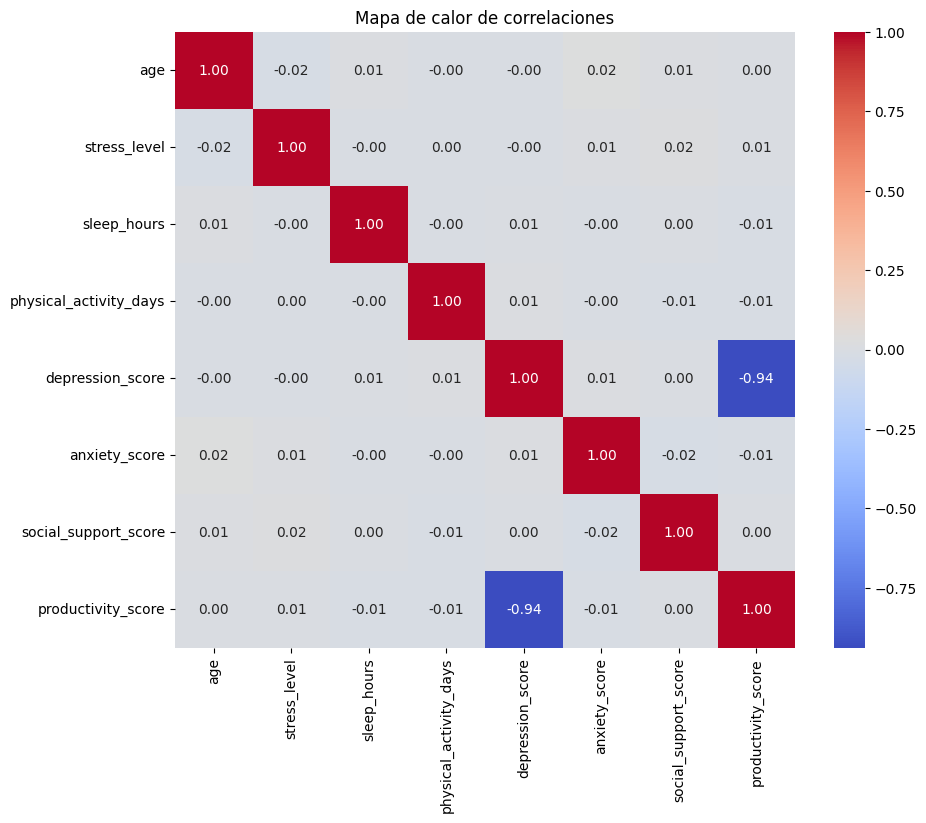

In [28]:
print(" Mapa de calor de correlaciones generado.")
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()
# explicación de cuando ocurree una correlación alta


Correlación alta: Cuando el valor absoluto de la correlación es mayor a 0.7, indica una relación lineal fuerte entre las variables.

Inicialmente, podemos observar una tendencia en los datos que indica una relación entre la productividad y la depresión. Esto sugiere que a medida que aumenta el puntaje de depresión, la productividad tiende a disminuir.

# 8. Relación entre algunas variables categoricas


['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']


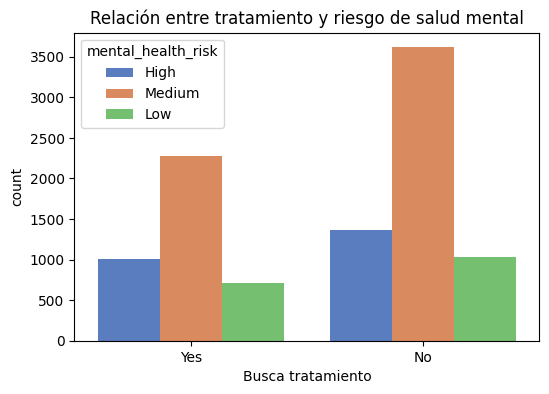

In [ ]:
print(categorical_vars)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='seeks_treatment', hue='mental_health_risk')
plt.title('Relación entre tratamiento y riesgo de salud mental')
plt.xlabel('Busca tratamiento')
plt.show()


### Análisis Relevante de los Resultados

Como no se encontraron valores nulos en el dataset, para un posterior trabajo de entrenamiento de una red neuronal se buscará simularlos. Esto permitirá evaluar cómo el modelo maneja datos faltantes y su impacto en el rendimiento.

1. **Distribución de Variables Categóricas**:
    - Se analizaron las variables categóricas principales del dataset, como `gender`, `employment_status`, y `mental_health_risk`.
    - Las gráficas muestran una distribución desigual en algunas categorías, como el predominio de personas empleadas y el riesgo de salud mental alto.

2. **Distribución de Variables Numéricas**:
    - Las variables numéricas, como `stress_level` y `depression_score`, presentan distribuciones variadas. Por ejemplo, el nivel de estrés tiende a concentrarse en valores medios, mientras que el puntaje de depresión muestra una mayor dispersión.

3. **Correlación entre Variables Numéricas**:
    - El mapa de calor de correlaciones destaca relaciones significativas entre algunas variables, como la correlación negativa entre `productivity_score` y `depression_score`. Esto sugiere que a mayor depresión, la productividad tiende a disminuir.

4. **Relación entre Variables Categóricas**:
    - Se observó una relación interesante entre `seeks_treatment` y `mental_health_risk`. Las personas con alto riesgo de salud mental tienden a buscar tratamiento con mayor frecuencia.

### Explicación de lo Realizado

Se realizaron análisis exploratorios para comprender mejor las características del dataset. Esto incluyó:
- Visualización de distribuciones de variables categóricas y numéricas.
- Identificación de correlaciones entre variables numéricas mediante un mapa de calor.
- Exploración de relaciones entre variables categóricas clave.

Estos análisis proporcionan una base sólida para identificar patrones y relaciones en los datos, lo que puede ser útil para futuras etapas del proyecto, como la construcción de modelos predictivos o la implementación de estrategias de intervención. 
